## **Unsupervised Learning: Cep Survey, April 2015.**

Here we will take a look at the survey and apply some unsupervised learning techniques.

* K-Means Clustering
    * Scaling
    * Normalization
* Hierachical clustering
* Principal Component Analysis
* Non Negative Matrix Factorization


> <i>Reference: https://www.cepchile.cl/cep/encuestas-cep/encuestas-2009-2018/estudio-nacional-de-opinion-publica-abril-2015</i>

## Importing data

* Clean up political self identification variable
* Create a numpy array of themometer feeling scores

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Import Data from april 2015 CEP Survey
cep73 = pd.read_csv("https://raw.githubusercontent.com/rarmijok/Analytical-Politics/master/DATA/Encuesta%20CEP%2073%20Abril%202015.csv", index_col='FILTRO')
###PENDING: IMPORT FROM SPSS FILE

cleanup_nums = {"POSICION_POLITICA":{1:"Right",2:"Center",3:"Left",4:"Independent",5:np.nan}}
pos_order=["Left","Center","Right","Independent"]
cep73.replace(cleanup_nums, inplace=True)
#cep73["POSICION_POLITICA"]= cep73["POSICION_POLITICA"].astype('category')

#Rename T Score Columns
cep73=cep73.rename(columns={"MB_P19_A":"A Allamand","MB_P19_B":"I Allende","MB_P19_C":"O Andrade","MB_P19_D":"A Arenas","MB_P19_E":"M Bachelet","MB_P19_F":"M Enriquez-O","MB_P19_G":"C Escalona","MB_P19_H":"A Espina","MB_P19_I":"N Eyzaguirre","MB_P19_J":"G Girardi","MB_P19_K":"R LagosE","MB_P19_L":"R LagosW","MB_P19_M":"E Matthei","MB_P19_N":"C Mockenber","MB_P19_O":"C Montes","MB_P19_P":"MJ Ossandon","MB_P19_Q":"R Penailillo",  "MB_P19_R":"L Perez","MB_P19_S":"S Pinera","MB_P19_T":"J Pizarro","MB_P19_U":"J Quintana","MB_P19_V":"X Rincon","MB_P19_W":"G Tellier","MB_P19_X":"C Toha","MB_P19_Y":"C Vallejo","MB_P19_Z":"A Velasco","MB_P19_AA":"Von Baer","MB_P19_BB":"I Walker", "MB_P19_CC":"P Walker","MB_P19_DD":"Ma Nunez","MB_P19_EE":"F Kast"})
cep73[cep73.iloc[:,33:64]>5]=np.nan 
#Thermometer Scores matrix / SUBSET T SCORES
T = cep73.iloc[:,33:64]
pos=cep73["POSICION_POLITICA"]
print(pos.head())
Tcomplete = T.dropna()
Tcompletedf = Tcomplete
Tcomplete = Tcomplete.to_numpy()
T = T.to_numpy() #JOJO
#print(Tcomplete)

FILTRO
1    Independent
2    Independent
3    Independent
4    Independent
5           Left
Name: POSICION_POLITICA, dtype: object


## K-Means Clustering: Inertias

* How many cluster?
    * Elbow method


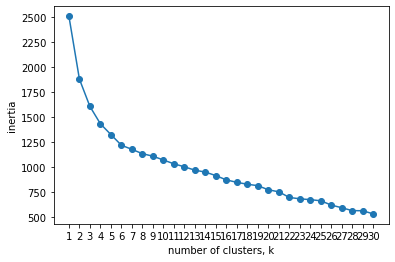

In [4]:
ks = range(1, 31)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(Tcomplete)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_) 
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()




## Kmeans 
* 3 clusters

1608.0576744186048


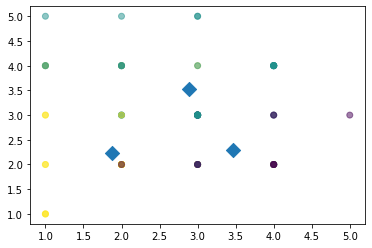

In [6]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)
model.fit(Tcomplete)
print(model.inertia_)

# Determine the cluster labels of new_points: labels
labels = model.predict(Tcomplete)#OJO OJO OJO Tcomplete
#print(labels)

# Make a scatter plot using labels to define the colors
plt.scatter(Tcomplete[:,0],y = Tcomplete[:,1],alpha=0.5,c=labels) #OJO OJO OJO Tcomplete

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=100.)
plt.show()


# Scaler
* Data transformation


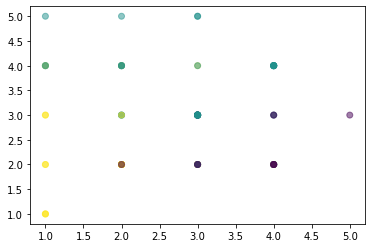

In [7]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(Tcomplete)

# Calculate the cluster labels: labels
labels_scaler = pipeline.predict(Tcomplete)


# Make a scatter plot using labels to define the colors
plt.scatter(Tcomplete[:,0],y = Tcomplete[:,1],alpha=0.5,c=labels) #OJO OJO OJO Tcomplete
# # Assign the cluster centers: centroids
# centroids = pipeline.cluster_centers_
# # Assign the columns of centroids: centroids_x, centroids_y
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
# # Make a scatter plot of centroids_x and centroids_y
# plt.scatter(centroids_x,centroids_y,marker='D',s=100.)
plt.show()



# Normalization

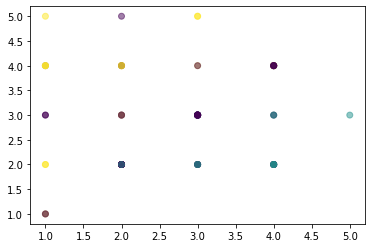

In [8]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer
normalizer = Normalizer()

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements

pipeline.fit(Tcomplete)

# Predict the cluster labels: labels
labels = pipeline.predict(Tcomplete)

# Make a scatter plot using labels to define the colors
plt.scatter(Tcomplete[:,0],y = Tcomplete[:,1],alpha=0.5,c=labels) #OJO OJO OJO Tcomplete
plt.show()


# Hierarchical Clustering


(85, 31)
(31, 85)
<class 'list'>


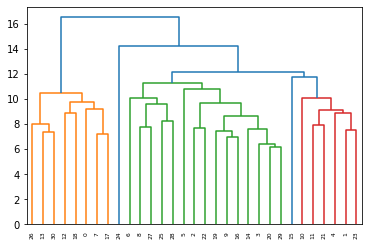

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

print(Tcomplete.shape)
print(np.transpose(Tcomplete).shape)
polit=list(Tcompletedf.columns) # MOVE TO TOP
print(type(polit))
mergings = linkage(np.transpose(Tcomplete),method='complete')#labels=polit

dendrogram(mergings,leaf_rotation=90,leaf_font_size=6)
plt.show()


# Intermediate clustering on height
* Height on dendrogram = distance between merging clusters

In [45]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 12, criterion='distance')
print(labels)
pairs = pd.DataFrame({'Group': labels,'Politians': polit})
print(pairs.sort_values('Group'))

[1 3 2 2 3 2 2 1 2 2 3 3 1 1 2 3 2 1 1 2 2 3 2 3 4 2 1 2 2 2 1]
    Group     Politians
0       1    A Allamand
26      1      Von Baer
18      1      S Pinera
17      1       L Perez
13      1   C Mockenber
12      1     E Matthei
7       1      A Espina
30      1        F Kast
8       2  N Eyzaguirre
28      2      P Walker
27      2      I Walker
25      2     A Velasco
22      2     G Tellier
20      2    J Quintana
6       2    C Escalona
2       2     O Andrade
3       2      A Arenas
19      2     J Pizarro
29      2      Ma Nunez
14      2      C Montes
5       2  M Enriquez-O
9       2     G Girardi
16      2  R Penailillo
4       3    M Bachelet
21      3      X Rincon
23      3        C Toha
11      3      R LagosW
1       3     I Allende
10      3      R LagosE
15      3   MJ Ossandon
24      4     C Vallejo


## t-SNE for 2-dimensional maps


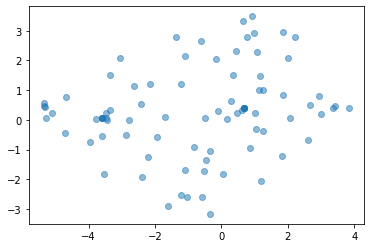

In [63]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=50)
transformed = model.fit_transform(Tcomplete)


plt.scatter(transformed[:,0], transformed[:,1],alpha=0.5)#C=labels
plt.show()

# Principal Component Analysis
* How many Dimensions
* Dimension Reduction


(31, 31)


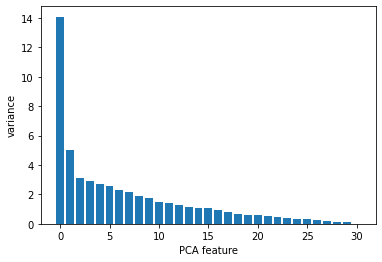

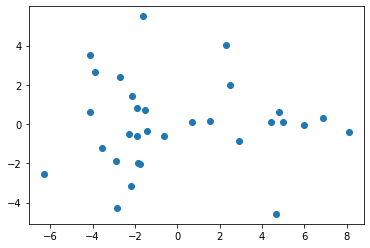

-6.590431325670387e-15


In [80]:
from scipy.stats import pearsonr
from sklearn.decomposition import PCA


model = PCA()
model.fit(np.transpose(Tcomplete))
print(transformed.shape)

features=range(model.n_components_)
plt.bar(features,model.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


#
model = PCA(n_components=2)
model.fit(np.transpose(Tcomplete))
transformed = model.transform(np.transpose(Tcomplete))

plt.scatter(transformed[:,0],transformed[:,1])
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(transformed[:,0],transformed[:,1])
print(correlation)


# Non-Negative Matrix Factorization